## Practicing 8 Important Regression Algorithm

1.Linear Regression
2.polynomial Regression
3.Ridge regression
4.Lasso Regression
5.SVR
6.Decision Tree Regressor
7.Random Forest regresser
8.XGboost

### Synthetic Dataset

This code creates a synthetic dataset where X contains 100 evenly spaced values between -3 and 3, and y is a noisy sine wave (sine function + random noise).
It also defines X_range with 300 points between -3 and 3 to plot smoother prediction curves.

In [22]:
import numpy as np
# Synthetic dataset
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Smooth range for plotting
X_range = np.linspace(-3, 3, 300).reshape(-1, 1)
X_range

array([[-3.        ],
       [-2.97993311],
       [-2.95986622],
       [-2.93979933],
       [-2.91973244],
       [-2.89966555],
       [-2.87959866],
       [-2.85953177],
       [-2.83946488],
       [-2.81939799],
       [-2.7993311 ],
       [-2.77926421],
       [-2.75919732],
       [-2.73913043],
       [-2.71906355],
       [-2.69899666],
       [-2.67892977],
       [-2.65886288],
       [-2.63879599],
       [-2.6187291 ],
       [-2.59866221],
       [-2.57859532],
       [-2.55852843],
       [-2.53846154],
       [-2.51839465],
       [-2.49832776],
       [-2.47826087],
       [-2.45819398],
       [-2.43812709],
       [-2.4180602 ],
       [-2.39799331],
       [-2.37792642],
       [-2.35785953],
       [-2.33779264],
       [-2.31772575],
       [-2.29765886],
       [-2.27759197],
       [-2.25752508],
       [-2.23745819],
       [-2.2173913 ],
       [-2.19732441],
       [-2.17725753],
       [-2.15719064],
       [-2.13712375],
       [-2.11705686],
       [-2

### 1.linear regression:

This code fits a Linear Regression model to the dataset, predicting y from X with a straight line.
The plot shows the actual data points in gray and the model’s linear fit in red.

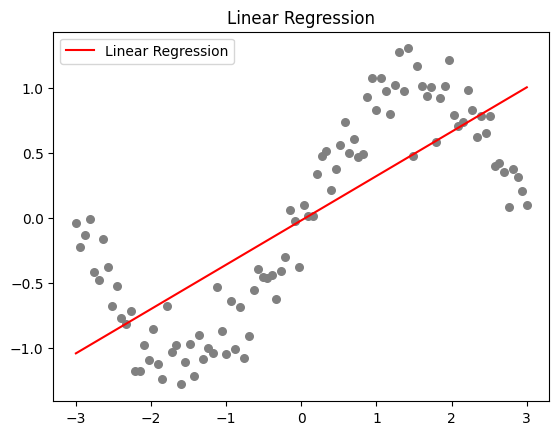

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_range)

plt.scatter(X, y, color="gray", s=30) # s=size od scatter plot
plt.plot(X_range, y_pred, color="red", label="Linear Regression")
plt.title("Linear Regression")
plt.legend()
plt.show()


### 2.Polynomial regression:

This code uses PolynomialFeatures (degree=3) to transform the input data and then fits a linear regression model on those features.
It captures the non-linear sine pattern much better than simple linear regression, producing a smooth curved fit.

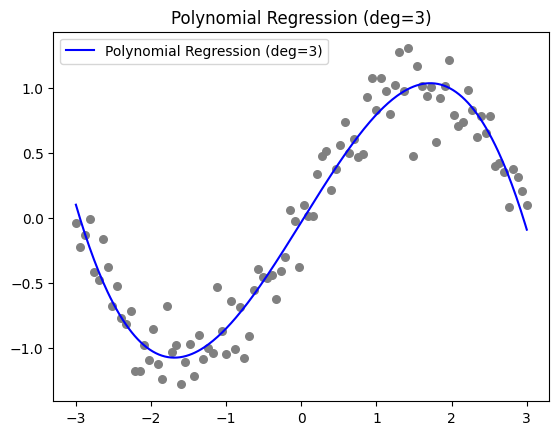

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#  Polynomial transformation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)   # Original X ko polynomial terms me convert kiya

# Linear regression on polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#  Prediction
y_pred = lin_reg.predict(poly.transform(X_range))

# Step 4: Plot
plt.scatter(X, y, color="gray", s=30)
plt.plot(X_range, y_pred, color="blue", label="Polynomial Regression (deg=3)")
plt.title("Polynomial Regression (deg=3)")
plt.legend()
plt.show()



### 3. Ridge Regression:

This code creates a Ridge Regression model with alpha=1.0, which applies L2 regularization to control overfitting.
The alpha value determines how strongly large coefficients are penalized — higher values mean stronger regularization.

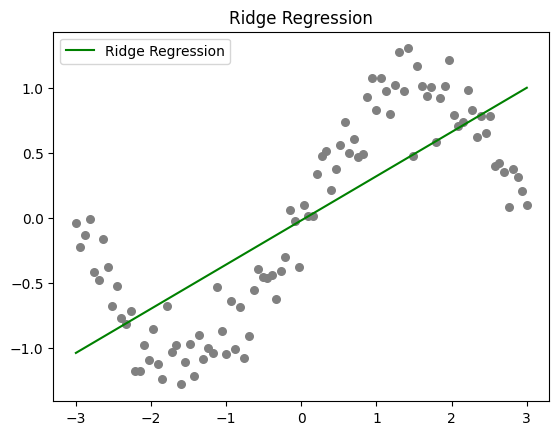

In [27]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
y_pred = ridge_model.predict(X_range)

plt.scatter(X, y, color="gray", s=30)
plt.plot(X_range, y_pred, color="green", label="Ridge Regression")
plt.title("Ridge Regression")
plt.legend()
plt.show()


### 4.Lasso regression:

This code trains a Lasso Regression model (alpha=0.01) which uses L1 regularization to shrink some coefficients, possibly to zero.
It then predicts on X_range and plots the fitted regression line against the noisy data.

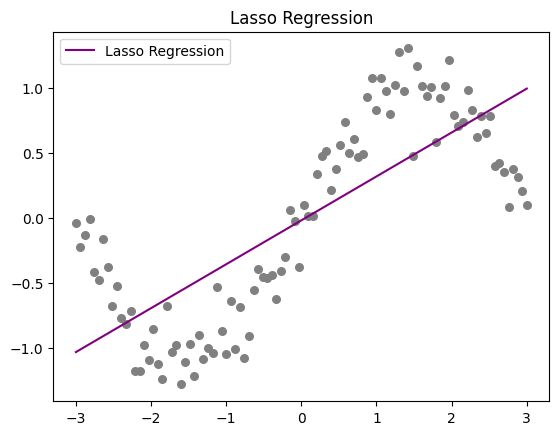

In [28]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X, y)
y_pred = lasso_model.predict(X_range)

plt.scatter(X, y, color="gray", s=30)
plt.plot(X_range, y_pred, color="purple", label="Lasso Regression")
plt.title("Lasso Regression")
plt.legend()
plt.show()


### SVR:

This code applies Support Vector Regression (SVR) with an RBF kernel after scaling the data, allowing it to capture complex non-linear relationships.
The resulting curve is smooth and flexible, closely following the sine-like pattern in the dataset.

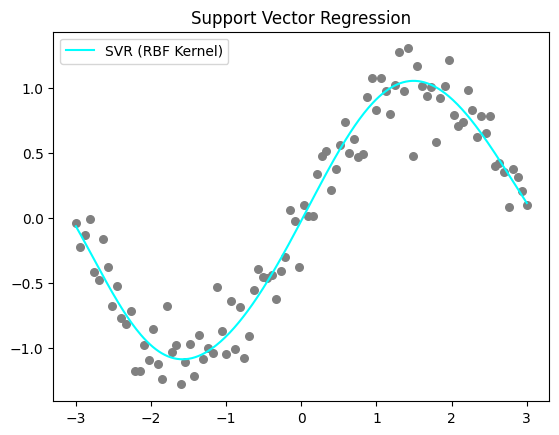

In [30]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#  Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_range_scaled = scaler.transform(X_range)

#  Train SVR
svr_model = SVR(kernel="rbf", C=10, epsilon=0.1)
svr_model.fit(X_scaled, y)

#  Prediction
y_pred = svr_model.predict(X_range_scaled)

# plot
plt.scatter(X, y, color="gray", s=30)
plt.plot(X_range, y_pred, color="cyan", label="SVR (RBF Kernel)")
plt.title("Support Vector Regression")
plt.legend()
plt.show()


### 6. Decision Tree Regresser:

This code trains a Decision Tree Regressor (max_depth=5) which splits the data into regions and predicts piecewise constant values.
The plot shows how the tree captures non-linear patterns, but the curve appears step-like instead of smooth

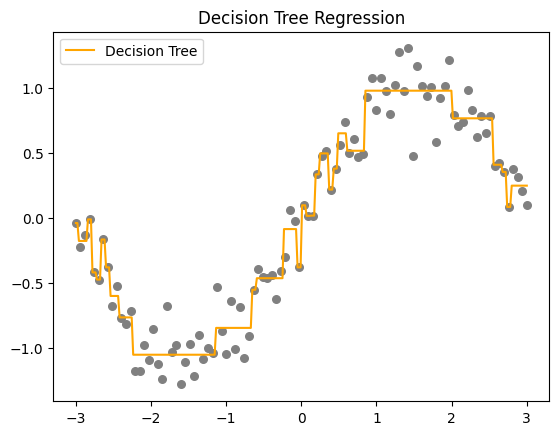

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X, y)
y_pred = tree_model.predict(X_range)

plt.scatter(X, y, color="gray", s=30)
plt.plot(X_range, y_pred, color="orange", label="Decision Tree")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


### 7.Random Forest Regressor:

This code fits a Random Forest Regressor with 100 trees, combining multiple decision trees to improve accuracy and reduce overfitting.
The plotted curve is smoother than a single decision tree, capturing non-linear trends more effectively.

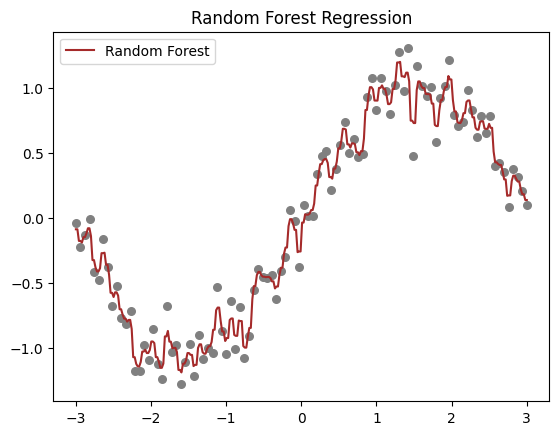

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
y_pred = rf_model.predict(X_range)

plt.scatter(X, y, color="gray", s=30)
plt.plot(X_range, y_pred, color="brown", label="Random Forest")
plt.title("Random Forest Regression")
plt.legend()
plt.show()


### 8.XGBoost Regressor:

This code trains an XGBoost Regressor with 200 boosting rounds, learning rate = 0.1, and tree depth = 4 to model complex patterns.
The plotted curve shows how boosting combines many weak trees into a strong predictor, giving a smooth and accurate fit.

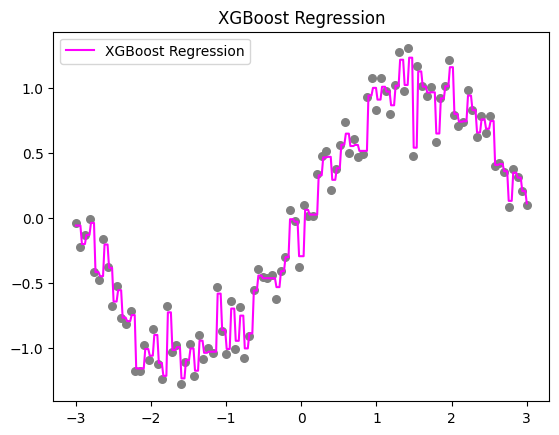

In [19]:
from xgboost import XGBRegressor

# XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X, y)
y_pred = xgb_model.predict(X_range)

# Plot
plt.scatter(X, y, color="gray", s=30)
plt.plot(X_range, y_pred, color="magenta", label="XGBoost Regression")
plt.title("XGBoost Regression")
plt.legend()
plt.show()


### Important Note



For linear patterns, Linear/Ridge/Lasso are sufficient.

For non-linear patterns, Polynomial, SVR, Random Forest, and XGBoost perform much better.

Among them, XGBoost and Random Forest generally give the best trade-off between accuracy and generalization.